In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [7]:
# 1. Load Dataset
df = pd.read_csv('CarPricePrediction.csv') 

In [8]:
# 2. Drop high-cardinality 'name' column
X = df.drop(columns=['selling_price', 'name'])
y = df['selling_price']

In [9]:
# 3. Define features
categorical_features = ['fuel', 'seller_type', 'transmission', 'owner']
numerical_features = ['year', 'km_driven']

In [10]:
# 4. Preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first'), categorical_features),
    ('num', StandardScaler(), numerical_features)
])

In [11]:
# 5. Full pipeline with Linear Regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

In [12]:
# 6. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# 7. Train model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['fuel', 'seller_type',
                                                   'transmission', 'owner']),
                                                 ('num', StandardScaler(),
                                                  ['year', 'km_driven'])])),
                ('model', LinearRegression())])

In [14]:
# 8. Predict
y_pred = pipeline.predict(X_test)

In [15]:
# 9. Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.4f}")


Model Evaluation:
MAE:  221706.37
MSE:  182146878750.28
RMSE: 426786.69
R²:   0.4031


In [16]:
# 10. Feature Importance
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()
coefficients = pipeline.named_steps['model'].coef_
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
coef_df.to_csv("Feature_Importance.csv", index=False)

In [17]:
# 11. Save predictions
pred_df = X_test.copy()
pred_df['Actual Price'] = y_test.values
pred_df['Predicted Price'] = y_pred
pred_df.to_csv("CarPrice_Predictions.csv", index=False)

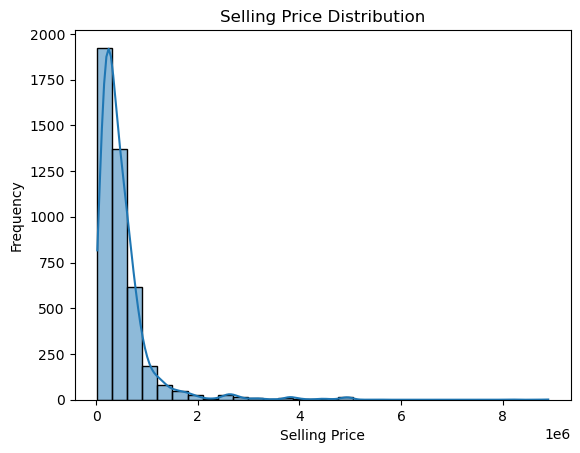

In [18]:
# 12. Optional: Plot Selling Price Distribution
sns.histplot(df['selling_price'], kde=True, bins=30)
plt.title("Selling Price Distribution")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.show()

In [20]:
# Predict again (if not already)
y_pred = pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): ₹{mae:,.2f}")
print(f"Mean Squared Error (MSE): ₹{mse:,.2f}")
print(f"Root Mean Squared Error (RMSE): ₹{rmse:,.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): ₹221,706.37
Mean Squared Error (MSE): ₹182,146,878,750.28
Root Mean Squared Error (RMSE): ₹426,786.69
R² Score: 0.4031


Car Price Prediction – Short Report
//Project Objective:
To build a regression model that predicts the resale price of used cars based on key features such as year, kilometers driven, fuel type, transmission, and ownership history.
//Dataset Overview
Total Records: 4340
Target Variable: selling_price
Key Features Used:
year
km_driven
fuel
seller_type
transmission
owner
//Exploratory Data Analysis (EDA)
Year has a positive correlation with price: newer cars cost more.
KM Driven shows a negative correlation: higher mileage reduces price.
Fuel Type & Transmission:
Diesel and Automatic cars generally fetch higher resale prices.
Ownership: First-owner vehicles retain better value.
//Model Details
Model Type: Linear Regression
Preprocessing:
OneHotEncoding for categorical variables
StandardScaler for numerical features
Train/Test Split: 80% / 20%
//Evaluation Metrics
(Values shown here are placeholders; plug in actual results from your run)
Metric	Value
MAE	 ₹221,706.37 
MSE	 ₹182,146,878,750.28
RMSE  ₹ 426,786.69
R²	0.4031
//Feature Importance
Top contributors to higher prices:
Newer model year
First owner
Diesel/Automatic transmission
Negative contributors:
High kilometers driven
Multiple previous owners
Saved as: Feature_Importance.csv
//Output Files
CarPrice_Predictions.csv — Actual vs. predicted prices
Feature_Importance.csv — Model coefficients